# Inflearn Python NLP tutorials 1
## 2018/07/03 ~ 2018/07/05

In [1]:
import pandas as pd

"""
header = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3은 쌍따옴표를 무시하도록 한다.
"""

train = pd.read_csv("data/labeledTrainData.tsv", header=0, delimiter='\t', quoting=3)
test = pd.read_csv("data/testData.tsv", header=0, delimiter='\t', quoting=3)

train.shape

(25000, 3)

In [2]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
# train 데이터에서 sentiment column을 제거함
test.shape

(25000, 2)

In [4]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [6]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [8]:
# html 태그를 걸러내줄 필요가 있음
# 첫 번째 리뷰를 700자까지 잘라서 보여줌
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

## 1. BeautifulSoup 를 통해 HTML 태그를 제거
## 2. 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
## 3. 텍스트를 모두 소문자로 변환
## 4. 공백을 기준으로 텍스트를 분해

In [9]:
# jupyter 환경에 패키지가 설치되어있는지 여부를 확인
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.6.0
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: c:\users\psy\anaconda3\lib\site-packages
Requires: 
Required-by: conda-build


In [10]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0], 'html5lib')

# 첫 리뷰의 앞 700자와 beautifulsoup를 거친 결과를 비교 - html5태그가 모두 제거됨
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [11]:
# 정규표현식을 사용해서 특수문자를 제거
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
# re.sub(param1, param2, param3)
# param3 에서 param1에 해당하는 표현을 param2로 모두 대체
only_alphabets = re.sub('[^a-zA-Z]', ' ', example1.get_text())
only_alphabets[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [12]:
# 모두 소문자로 변환
lower_case = only_alphabets.lower()
print(type(only_alphabets))
# 텍스트를 공백을 기준으로 토큰 단위로 분해한다.
words = lower_case.split()
print(len(words))
words[:10]

<class 'str'>
437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

# NLTK를 이용해 불용어(Stopword)를 제거

In [13]:
import nltk
from nltk.corpus import stopwords
# 영어로 된 stopwords(불용어) - 제거해야 한다.
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
words = [w for w in words if w not in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

# 어간 추출(Stemming)
## 어간 : 어형이 번형된 단어로부터 접사등을 제거한 것
## ex) cats, catlike, catty -> cat
## NLTK에서 제공하는 형태소 분석기를 사용
### 1. 포터 형태소 분석기 : 보수적
### 2. 랭커스터 형태소 분석기 : 좀 더 적극적

In [15]:
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(stemmer.stem("running")))
print("The stemmed form of runs is : {}".format(stemmer.stem("runs")))
print("The stemmed form of run is : {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is : run
The stemmed form of runs is : run
The stemmed form of run is : run


In [16]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is : {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is : {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running is : run
The stemmed form of runs is : run
The stemmed form of run is : run


In [17]:
# 처리하기 전의 words list
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [18]:
from nltk.stem.snowball import SnowballStemmer
# SnowballStemmer 은 언어를 지정해주어야 한다.
stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
# 처리후의 words list
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

# Lemmatization 음소표기법
## 동음이의어가 문맥에 따라 다른 의미를 갖는 경우를 관리
### 1) 배가 맛있다.
### 2) 배를 타는 것이 재미있다.
### 3) 평소보다 두 배로 많이 먹어서 배가 아프다

### *단어가 문장에서 어떠한 품사/의미로 쓰였는지에 따라 적합한 의미를 갖도록 추출하는 것이다.

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PSY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# lemmatize examples
print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize("flies"))



fly
fly


In [21]:
words = [wordnet_lemmatizer.lemmatize(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

# Raw review가 들어왔을 때 가공하는 과정
## 1. HTML5 태그 모두 제거
## 2. 정규표현식을 통해 특수문자 제거
## 3. 텍스트를 소문자로 변환
## 4. 공백을 기준으로 텍스트를 분해
## 5. NLTK를 이용해서 불용어(stopwords)제거
## 6. 어간 추출
## 7. 음소표기법

In [22]:
def words_processing(raw_data):
    # html 태그 제거
    no_html_tags = BeautifulSoup(raw_data, 'html5lib').get_text()
    # 정규표현식을 통해 특수문자를 제거
    only_alphabets = re.sub("[^a-zA-Z]", " ", no_html_tags)
    # 소문자로 변환
    only_alphabets = only_alphabets.lower()
    # 공백 단위로 분할
    bag_of_words = only_alphabets.split()
    # 파이썬에서는 리스트보다 세트에서 찾는게 훨씬 빠르기 때문에 set로 변환한다.
    # stopwords를 얻어온다.
    stop_words = set(stopwords.words('english'))
    words_with_no_stopwords = [w for w in bag_of_words if w not in stop_words]
    # 어간추출 및 음소표기법
    stemmer = SnowballStemmer('english')
    stemmed_word_set = [stemmer.stem(w) for w in words_with_no_stopwords]
    return (' '.join(stemmed_word_set))

In [23]:
words_processing(train['review'][0])


'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [24]:
num_of_reviews = train['review'].size
num_of_reviews

25000

In [25]:
# 모든 리뷰에 대해서 processing을 진행
# 프로그램의 진행을 표시하기 위해 5000리뷰마다 로그를 찍도록 한다.

processed_review = list()
for i, review in enumerate(train['review']):
    processed_review.append(words_processing(review))
    if (i+1) % 5000 == 0:
        print("{} done".format(i+1))

5000 done
10000 done
15000 done
20000 done
25000 done


# Multiprocessing code
## kwargs 이란?
### keywords arguments - **kwargs를 사용
### 함수가 임의 개수의 keywords arguments를 받게 하기 위한 것
### 함수에 딕셔너리 형태로 파라미터를 넘기고 싶을 때도 사용 가능

In [31]:
"""
# 텍스트 처리에 너무 많은 시간이 걸리므로 멀티프로세싱 기법을 사용하도록 한다.
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # workers를 kwargs(keyword arguments)로부터 가져온다.
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터 프레임을 워커의 수만큼 나눠서 작업
    result = pool.map(_apply_df, [(d, func, kwargs) 
                                 for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))
    """

"\n# 텍스트 처리에 너무 많은 시간이 걸리므로 멀티프로세싱 기법을 사용하도록 한다.\nfrom multiprocessing import Pool\nimport numpy as np\n\ndef _apply_df(args):\n    df, func, kwargs = args\n    return df.apply(func, **kwargs)\n\ndef apply_by_multiprocessing(df, func, **kwargs):\n    # workers를 kwargs(keyword arguments)로부터 가져온다.\n    workers = kwargs.pop('workers')\n    # 위에서 가져온 workers 수로 프로세스 풀을 정의\n    pool = Pool(processes=workers)\n    # 실행할 함수와 데이터 프레임을 워커의 수만큼 나눠서 작업\n    result = pool.map(_apply_df, [(d, func, kwargs) \n                                 for d in np.array_split(df, workers)])\n    pool.close()\n    # 작업 결과를 합쳐서 반환\n    return pd.concat(list(result))\n    "

In [32]:
"""
%time clean_train_reviews = apply_by_multiprocessing(train['review'], \
                                                     words_processing, workers=4)
"""

"\n%time clean_train_reviews = apply_by_multiprocessing(train['review'],                                                      words_processing, workers=4)\n"

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주면 노트북 안에서 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data=None, backgroundcolor='white', width=800, height=600):
    wordcloud=WordCloud(stopwords=STOPWORDS, background_color=backgroundcolor, width=width, height=height).generate(data)
    plt.figure(figsize = (15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

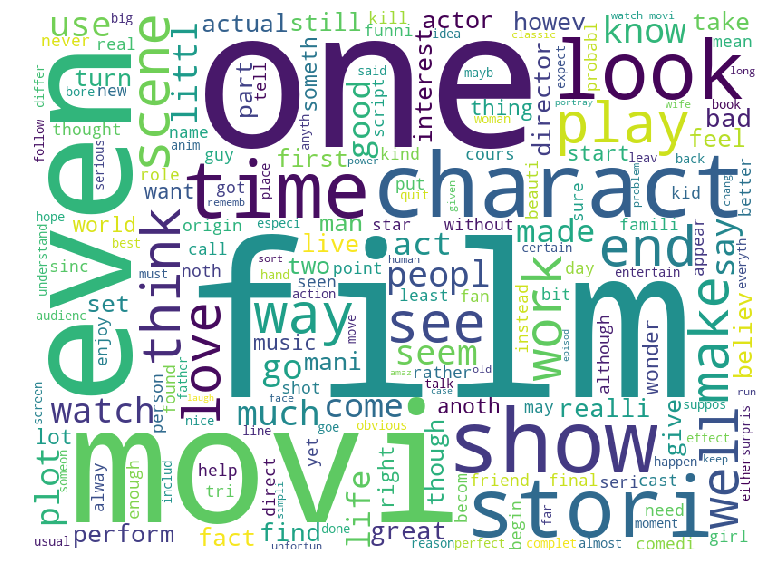

Wall time: 20.1 s


In [32]:
# train 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
# 워드 클라우드는 set에서 단어의 빈도수를 대략적으로 파악할 수 있게 해주지만
# 데이터 사이언스에서 큰 의미는 없는 시각화 기법이다.
%time displayWordCloud(" ".join(processed_review))

In [ ]:
processed_test_review = list()
for review in test['review']:
    processed_test_review.append(words_processing(review))
    
%time displayWordCloud(" ".join(processed_test_review))

In [57]:
# 각 리뷰의 단어 수를 저장하는 컬럼 생성
import numpy as np

num_words = lambda x:len(str(x).split())
num_unique_words = lambda x:len(set(str(x).split()))
words_count_list = [num_words(x) for x in processed_review]
words_count_unique = [num_unique_words(x) for x in processed_review]
np_words_count = np.asarray(words_count_list)
np_unique_count = np.asarray(words_count_unique)
train['num of words'] = np_words_count
train['num of unique words'] = np_unique_count
train.head(100)

,id,sentiment,review,num of words,num of unique words
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",219,156
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",84,63
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",240,201
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",189,158
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",210,188
5,"""8196_8""",1,"""I dont know why people think this is such a b...",43,34
6,"""7166_2""",0,"""This movie could have been very good, but com...",55,46
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm...",69,60
8,"""319_1""",0,"""A friend of mine bought this film for £1, and...",93,77
9,"""8713_10""",1,"""<br /><br />This movie is full of references....",23,21


# seaborn을 활용한 리뷰별 단어의 개수 통계
## 단어 개수의 
### 1. 평균
### 2. 중간 값
### 3. 최대 값
### 4. 최소 값
### 5. 그래프 (중간 값 라인 포함)

리뷰별 단어 평균 수 :  119.52356
리뷰별 단어 수 중간 값 :  89.0
리뷰별 단어 수 최대 값 :  1416
리뷰별 단어 수 최소 값 :  4

리뷰 별 고유 단어 평균 수 :  94.05756
리뷰 별 고유 단어 중간 값 :  74.0
리뷰 별 고유 단어 최대 값 :  521
리뷰 별 교유 단어 최소 값 :  4


C:\Users\PSY\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\PSY\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'리뷰별 고유한 단어 수 분포')

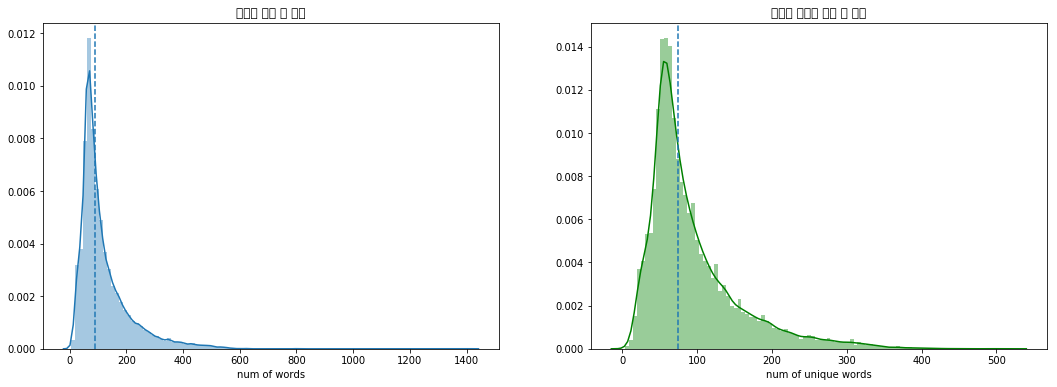

In [72]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18,6)
print("리뷰별 단어 평균 수 : ", train['num of words'].mean())
print("리뷰별 단어 수 중간 값 : ", train['num of words'].median())
print("리뷰별 단어 수 최대 값 : ", train['num of words'].loc[train['num of words'].idxmax()])
print("리뷰별 단어 수 최소 값 : ", train['num of words'].loc[train['num of words'].idxmin()])
sns.distplot(train['num of words'], bins=100, ax=axes[0])
axes[0].axvline(train['num of words'].median(), linestyle='dashed')
axes[0].set_title('리뷰별 단어 수 분포')
print()
print("리뷰 별 고유 단어 평균 수 : ", train['num of unique words'].mean())
print("리뷰 별 고유 단어 중간 값 : ", train['num of unique words'].median())
print("리뷰 별 고유 단어 최대 값 : ", train['num of unique words'].loc[train['num of unique words'].idxmax()])
print("리뷰 별 교유 단어 최소 값 : ", train['num of unique words'].loc[train['num of unique words'].idxmin()])
sns.distplot(train['num of unique words'], bins=100, color='g',ax=axes[1])
axes[1].axvline(train['num of unique words'].median(), linestyle='dashed')
axes[1].set_title('리뷰별 고유한 단어 수 분포')

# 텍스트 데이터 벡터화
### -> 머신 러닝 모델이 이해할 수 있는 형태로 토큰을 벡터로 변환
## sci-kit learn의 CountVectorizer를 통해 피처 생성
### 리뷰 별로 최소 min_df 이상 나타난 token 개수를 세어서 벡터화
### min_df는 사용자가 조정가능

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라미터 값을 수정함
# 파라미터 값만 수정해도 캐글 스코어 차이가 많이 남
vectorizer = CountVectorizer(analyzer='word', 
                            tokenizer=None,
                            preprocessor=None,
                            stop_words=None,
                            min_df=2, # 토큰이 나타날 최소 문서 개수
                            ngram_range=(1,3),
                            max_features=20000 # 가방에 토큰을 최대 몇 개까지 저장할지
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [77]:
# 바로 fit_transform을 진행하면 시간이 많이 걸리므로 속도 개선을 위해 파이프라인을 사용
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [78]:
# 25000개의 리뷰(doc)를 벡터화 - 20000차원
%time train_data_features = pipeline.fit_transform(processed_review)
train_data_features

Wall time: 30.3 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

In [95]:
# 리뷰 데이터가 25000개, 각 리뷰 별로 20000개의 토큰이 저장됨
# 값은 각 토큰의 리뷰 데이터에서의 등장 횟수
train_data_features.shape

<bound method BaseEstimator.get_params of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>


In [83]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [98]:
import numpy as np
dist = np.sum(train_data_features, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)

# dist : 각 피쳐(토큰)의 등장횟수
# vocab : 피쳐목록
pd.DataFrame(dist, columns=vocab)

[[26 48 22 ... 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,288,24,30,29,30,125,55,...,23,52,37,89,161,31,71,59,40,23


In [109]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scikit-learn
## 1. classification - 리뷰가 긍정 리뷰 or 부정 리뷰
## 2. regression - 자전거 대여량을 예측
## 3. clustering - 군집화(비슷한 단어들끼리 묶음)
## 4. dimensionality reduction - 차원축소

# 랜덤 포레스트 
## 다수의 decision tree의 집합(배깅, 임의 노드 최적화, 앙상블)
#### 랜덤 포레스트의 가장 핵심적인 특징은 임의성(randomness)에 의해 서로 조금씩 다른 특성을 갖는 트리들로 구성된다는 점이다. 이 특징은 각 트리들의 예측들이 decorrelation 되게 하며, 결과적으로 일반화(generalization) 성능을 향상시킨다. 또한 임의화는 포레스트가 노이즈가 포함된 데이터에 대해서도 잘 돌아가게 만든다.

In [110]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100,
                               n_jobs=-1, # 학습에 사용할 코어의 개수 : -1이면 최대 개수
                               random_state=2018)

In [111]:
# train - 각 리뷰를 벡터화 시킨 것 , label - 리뷰의 감정(긍정, 부정)을 나타냄
%time forest = forest.fit(train_data_features, train['sentiment'])

Wall time: 26.9 s


In [115]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(forest, \
                                      train_data_features,\
                                      train['sentiment'],\
                                      cv=10,\
                                      scoring='roc_auc'))

Wall time: 1h 46min 40s


In [118]:
print("score : ",  score)

score :  0.92761104


In [119]:
%time test_data_features = pipeline.transform(processed_test_review)
test_data_features

Wall time: 7.62 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2668191 stored elements in Compressed Sparse Row format>

In [120]:
test_data_features = test_data_features.toarray()

In [121]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [123]:
test_data_features[5][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [129]:
# 벡터화하여 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
vocab[19999]

'zucker'

In [130]:
result = forest.predict(test_data_features)

In [131]:
result[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [132]:
output = pd.DataFrame(data={'id' : test['id'], 'sentiment' : result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",0
3,"""7186_2""",1
4,"""12128_7""",1


In [136]:
import os
# get current directory
print(os.getcwd())
output.to_csv('data/tutorial_1_BOW_{0:.3f}.csv'.format(score*100), index=False, quoting=3)

C:\Users\PSY\Desktop\SVgit\Movie-Recommendation-System-at-Silicon-Valley\NLP_tuto_inflearn


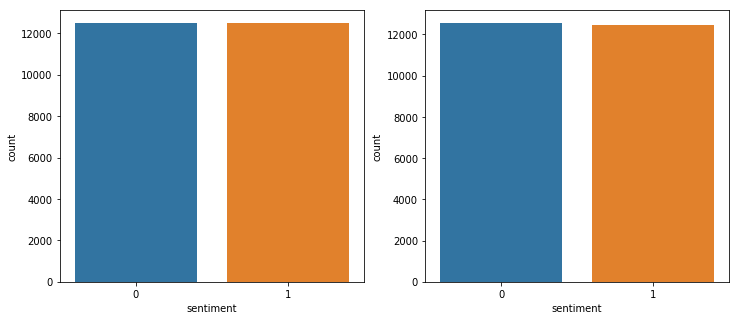

In [147]:
output_sentiments = output['sentiment'].value_counts()

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

# 더 해볼 수 있는 것
## 1. Bag of Words 표현을 위해 다른 수의 어휘 단어를 선택
## 2. 포터 스테밍